In [1]:
import numpy as np
import os
import pickle

# IMPORTO I DATI PER VOTTIGNASCO

# Ottieni il percorso effettivo da una variabile d'ambiente
work_path = os.environ['WORK']  # Ottieni il valore della variabile d'ambiente WORK
v_test_OHE_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_month_OHE.npy"
v_test_image_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_normalized_image_sequences.npy"
v_test_target_dates_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_target_dates.npy"
v_test_images_dates = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_image_sequences_dates.npy"
v_test_normalization_factors_std_path  = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/normalization_factors/Vottignasco_00425010001_training_target_std.npy"
v_test_normalization_factors_mean_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/normalization_factors/Vottignasco_00425010001_training_target_mean.npy"

# Carica l'array numpy dai file
vottignasco_test_OHE         = np.load(v_test_OHE_path)
vottignasco_test_image       = np.load(v_test_image_path)
vottignasco_test_dates       = np.load(v_test_target_dates_path)
vottignasco_test_image_dates = np.load(v_test_images_dates)
vott_target_test_std         = np.load(v_test_normalization_factors_std_path) 
vott_target_test_mean        = np.load(v_test_normalization_factors_mean_path)


print(len(vottignasco_test_dates))
print(len(vottignasco_test_image))
print(len(vottignasco_test_OHE))

105
105
105


In [2]:
import sys 

# Aggiungi il percorso della cartella XAI (risali di tre livelli dal notebook)
xai_path = os.path.abspath(os.path.join('..', '..', '..'))
sys.path.append(xai_path)

In [3]:
from common import plots

In [34]:
import importlib

# Forza il reload del modulo
importlib.reload(plots)

<module 'common.plots' from '/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/common/plots.py'>

In [48]:
import matplotlib.pyplot as plt

total_auc_insertion_s2_all = []
total_auc_deletion_s2_all  = []


total_auc_insertion_s3_all = []
total_auc_deletion_s3_all  = []

total_auc_insertion_s4_all = []
mean_insertion_errors_s4_all = []
total_auc_deletion_s4_all  = []
mean__deletion_errors_s4_all = []

path_to_load_results = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/results/01_marco_spatial_rise_original_stability20250311154927/rise_spatial_original_stability_seed{92}.pkl"
    # Load della lista results
with open(path_to_load_results, 'rb') as file:
    results = pickle.load(file)

for result in results:

    param = result["parameters_comb"]

    for index_i in range(2,5):
        s_i_errors_insertion = result["errors_insertion"][:,index_i-1,:]
        s_i_errors_deletion  = result["errors_deletion"][:,index_i-1,:]

        #output_path_ins_del = os.path.join(output_dir, f"{param}_ins_del_S_{index_i}.png")
        mean_errors_insertion_s_i,mean_errors_deletion_s_i, auc_insertion_s_i,auc_deletion_s_i = plots.plot_combined_curves_with_errors(s_i_errors_insertion, s_i_errors_deletion, title=f"Ins/Del Mean Curves S{index_i}_{param}")
        
        if (index_i == 2):
            total_auc_insertion_s2_all.append([auc_insertion_s_i, param])
            total_auc_deletion_s2_all.append([auc_deletion_s_i, param])
            
        elif (index_i == 3):
            total_auc_insertion_s3_all.append([auc_insertion_s_i, param])
            total_auc_deletion_s3_all.append([auc_deletion_s_i, param])
        else:
            total_auc_insertion_s4_all.append([auc_insertion_s_i, param])
            mean_insertion_errors_s4_all.append(mean_errors_insertion_s_i)
            total_auc_deletion_s4_all.append([auc_deletion_s_i, param])
            mean__deletion_errors_s4_all.append(mean_errors_deletion_s_i)

        plt.close()

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def plot_curves_with_stats(curves, title='Curva Media e Deviazione Standard', color='blue'):
    """
    Plotta più curve con la curva media tratteggiata e la banda della deviazione standard.
    
    Args:
        curves (list or np.array): Matrice (n_curves, n_points) contenente le curve.
        title (str): Titolo del grafico.
        color (str): Colore principale per la curva media e la banda della dev. standard.
    """
    # Converti le curve in array numpy
    curves = np.array(curves)
    
    # Asse x basato sul numero di punti delle curve
    x = np.linspace(0, curves.shape[1] - 1, curves.shape[1])
    
    # Calcolo della media e della deviazione standard punto per punto
    mean_curve = np.mean(curves, axis=0)
    std_curve = np.std(curves, axis=0)
    
    # Plot delle curve individuali
    plt.figure(figsize=(10, 6))
    for curve in curves:
        plt.plot(x, curve, color='skyblue', alpha=0.5)
    
    # Aggiunta della curva media tratteggiata
    plt.plot(x, mean_curve, color=color, linestyle='--', linewidth=2, label='Media')
    
    # Aggiunta della banda della deviazione standard
    plt.fill_between(x, mean_curve - std_curve, mean_curve + std_curve, color=color, alpha=0.2, label='±1 Dev. Std.')
    
    # Testo con la deviazione standard media
    plt.text(x[len(x) // 2], np.max(mean_curve) + 0.35, f'Dev. Std. Media: {np.mean(std_curve):.2f}', fontsize=10)
    
    # Personalizzazione del grafico
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Mostra il plot
    plt.show()
    plt.close()

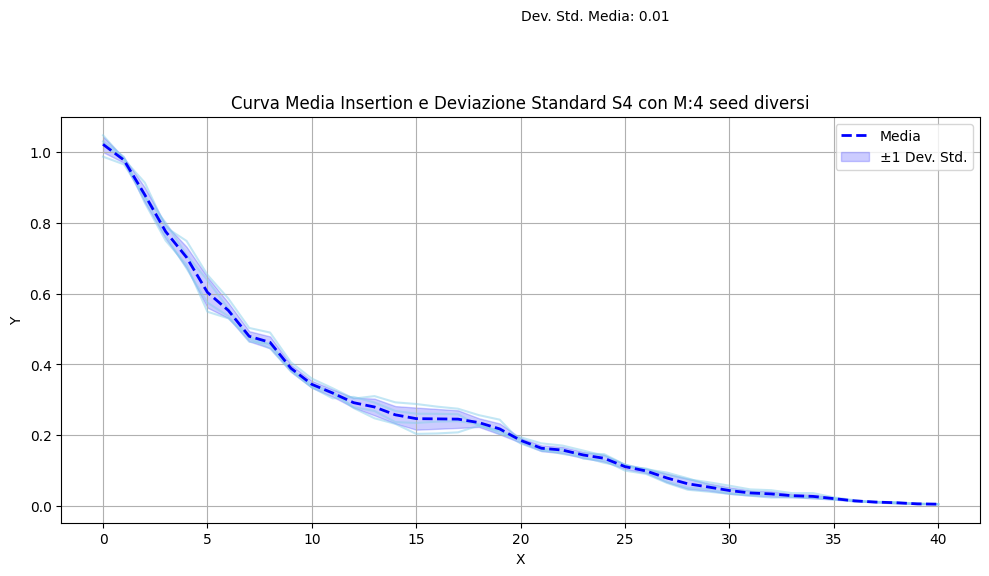

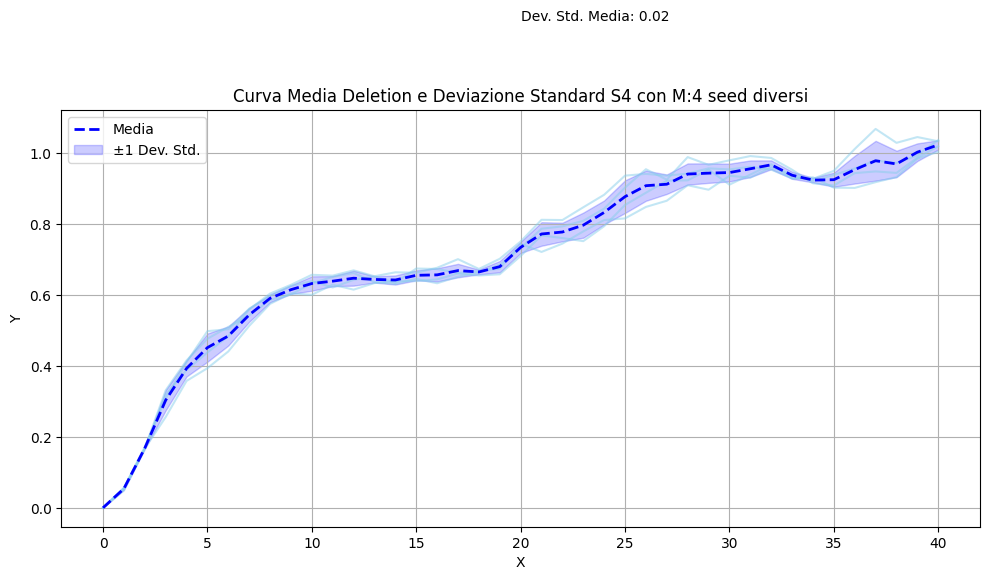

In [53]:
plot_curves_with_stats(mean_insertion_errors_s4_all, title=f"Curva Media Insertion e Deviazione Standard S4 con M:{4} seed diversi")
plot_curves_with_stats(mean__deletion_errors_s4_all, title=f"Curva Media Deletion e Deviazione Standard S4 con M:{4} seed diversi")

In [ ]:
plot_curves_with_stats(mean_insertion_errors_s4_all)

In [33]:
only_errors = [errors for errors,_ in total_auc_insertion_s2_all]

only_errors

[0.3629070091344017,
 0.38209739516622254,
 0.39614150464446063,
 0.36738600737692434]